# Kaggle: Titanic
Import training data from given train.csv file.

In [1]:
#import randomForestClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from scipy.stats import mode

df = pd.read_csv("train.csv")

Display the overview of the data:

In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We can observe from above data that it contains several data types: passengerID, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Pare, Cabin, and Embarked. The colum of Survived presents passenger survived with value 1, and dead with value 0. The colum Name, Ticket, Cabin will not affect the result of whether they survive or not. So, we will drop these three data types from our data frame.

In [3]:
df = df.drop(['Name','Ticket', 'Fare', 'Cabin'], axis=1)

Then, we check the rest of data to see if there are any missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Embarked       889 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


From above, there are some missing values or NaNs in Age and Embarked. The data in those rows will not be valid for evaluation, so we remove those lines of data.

In [5]:
age_mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(age_mean)

mode_embarked = mode(df['Embarked'])[0][0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

/Users/peiningche/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
/Users/peiningche/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:216: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


Since sklearn library can only take numerical data, we will convert all non-numeric information into numbers. 
We use 0 presents female and 1 presents male. 
For Embarked colum, using 1 presents C, 2 presents S, and 3 persents Q. 

In [6]:
df['Sex'] = df['Sex'].map({'female':0, 'male':1}).astype(int)

In [7]:
df['Embarked'] = df['Embarked'].map({'C':1, 'S':2, 'Q':3}).astype(int)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.000000,1,0,2
1,2,1,1,0,38.000000,1,0,1
2,3,1,3,0,26.000000,0,0,2
3,4,1,1,0,35.000000,1,0,2
4,5,0,3,1,35.000000,0,0,2
5,6,0,3,1,29.699118,0,0,3
6,7,0,1,1,54.000000,0,0,2
7,8,0,3,1,2.000000,3,1,2
8,9,1,3,0,27.000000,0,2,2
9,10,1,2,0,14.000000,1,0,1


Since survival or not is the most important factor in our data set, moving Survival to left-most value for convenience. And Let the final data frame be the training data, which will be used in later modeling fit.

In [8]:
cols = df.columns.tolist()
cols = [cols[1]] + cols[0:1] + cols[2:]
df = df[cols]
train = df.values

Then, read test data and clean the data frame in the same way of training data.

In [9]:
test_df = pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [10]:
test_df = test_df.drop(['Name','Ticket', 'Fare', 'Cabin'], axis=1)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Embarked       418 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 22.9+ KB


In [11]:
#replace NaN in age with mean of age
test_df['Age'] = test_df['Age'].fillna(age_mean)



In [12]:
                        

test_df['Sex'] = test_df['Sex'].map({'female':0, 'male':1}).astype(int)
test_df['Embarked'] = test_df['Embarked'].map({'C':1, 'S':2, 'Q':3}).astype(int)

test = test_df.values

# See data distribution in graphics
First, Lets look at the survival distribution among all passengers.

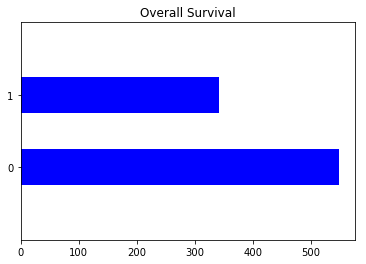

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,5))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color="blue")
ax.set_ylim(-1, len(df.Survived.value_counts())) 
plt.title("Overall Survival")

Then, let's see the survival distribution based on different data types.

# Making Predictions using Random Forest
Fit the training to RandomForest using sklearn library.

In [14]:


model = RandomForestClassifier(n_estimators = 100)
model = model.fit(train[0:,2:], train[0:,0])

We have build our model using RandomForest. Using the test data to predict based on given information, and write the result into a text file called result.csv.

In [15]:
output = model.predict(test[:,1:])

In [16]:
result = np.c_[test[:,0].astype(int), output.astype(int)]
df_result = pd.DataFrame(result[:,0:2], columns=['PassengerId', 'Survived'])
df_result.to_csv('result.csv', index=False)
result

array([[ 892,    0],
       [ 893,    0],
       [ 894,    0],
       [ 895,    1],
       [ 896,    0],
       [ 897,    0],
       [ 898,    1],
       [ 899,    0],
       [ 900,    0],
       [ 901,    0],
       [ 902,    0],
       [ 903,    0],
       [ 904,    1],
       [ 905,    0],
       [ 906,    1],
       [ 907,    1],
       [ 908,    0],
       [ 909,    1],
       [ 910,    0],
       [ 911,    0],
       [ 912,    0],
       [ 913,    1],
       [ 914,    1],
       [ 915,    1],
       [ 916,    1],
       [ 917,    0],
       [ 918,    1],
       [ 919,    0],
       [ 920,    0],
       [ 921,    0],
       [ 922,    0],
       [ 923,    0],
       [ 924,    0],
       [ 925,    0],
       [ 926,    0],
       [ 927,    0],
       [ 928,    0],
       [ 929,    1],
       [ 930,    0],
       [ 931,    0],
       [ 932,    0],
       [ 933,    0],
       [ 934,    0],
       [ 935,    1],
       [ 936,    1],
       [ 937,    0],
       [ 938,    0],
       [ 939,

In [17]:
df_result.shape

(418, 2)